In [1]:
from neural_network import Network,FC_layer,AC_layer,Activation

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the input data
X_train = X_train.reshape(-1, 28 * 28)  # Flatten images to 1D (784 features)
X_test = X_test.reshape(-1, 28 * 28)

# Normalize the input data
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the target labels
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.transform(y_test.reshape(-1, 1))

# Create a neural network instance
network = Network()

# Define the architecture of the network
network.add(FC_layer(784,256))
network.add(AC_layer(Activation().sigmoid,Activation().sigmoid_dr))
network.add(FC_layer(256,128))
network.add(AC_layer(Activation().tanh,Activation().tanh_prime))
network.add(FC_layer(128,10))
network.add(AC_layer(Activation().softmax,Activation().softmax_dr))

# Train the network
network.fit(X_train, y_train, epoch=20, learning_rate=0.01, batch_size=32, optimizer="ADAM", loss_type="Cross_entropy", regularization=None)

# Make predictions
predictions = network.predict(X_test)

# Convert the predictions to class labels
y_pred = np.argmax(predictions, axis=1)

# Convert the one-hot encoded labels to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the accuracy
accuracy = (y_pred == y_test_labels).mean()
print("Accuracy:", accuracy)


 0th Epoch error : 105.36031865228671
 1th Epoch error : 90.12228622825782
 2th Epoch error : 81.70968407767272
 3th Epoch error : 76.88205349961625
 4th Epoch error : 76.97969368480311
 5th Epoch error : 71.76526640852649
 6th Epoch error : 70.01528112366994
 7th Epoch error : 65.54638778355672
 8th Epoch error : 67.10272952284315
 9th Epoch error : 58.0217737336574
 10th Epoch error : 60.42681764260991
 11th Epoch error : 56.209640784880726
 12th Epoch error : 53.70477885213957
 13th Epoch error : 52.61617183266085
 14th Epoch error : 59.35174223252532
 15th Epoch error : 50.46497167888875
 16th Epoch error : 52.75452704288938
 17th Epoch error : 51.099358348812366
 18th Epoch error : 50.7363602191065
 19th Epoch error : 48.48913209241556
Accuracy: 0.9505


Accuracy: 0.9505


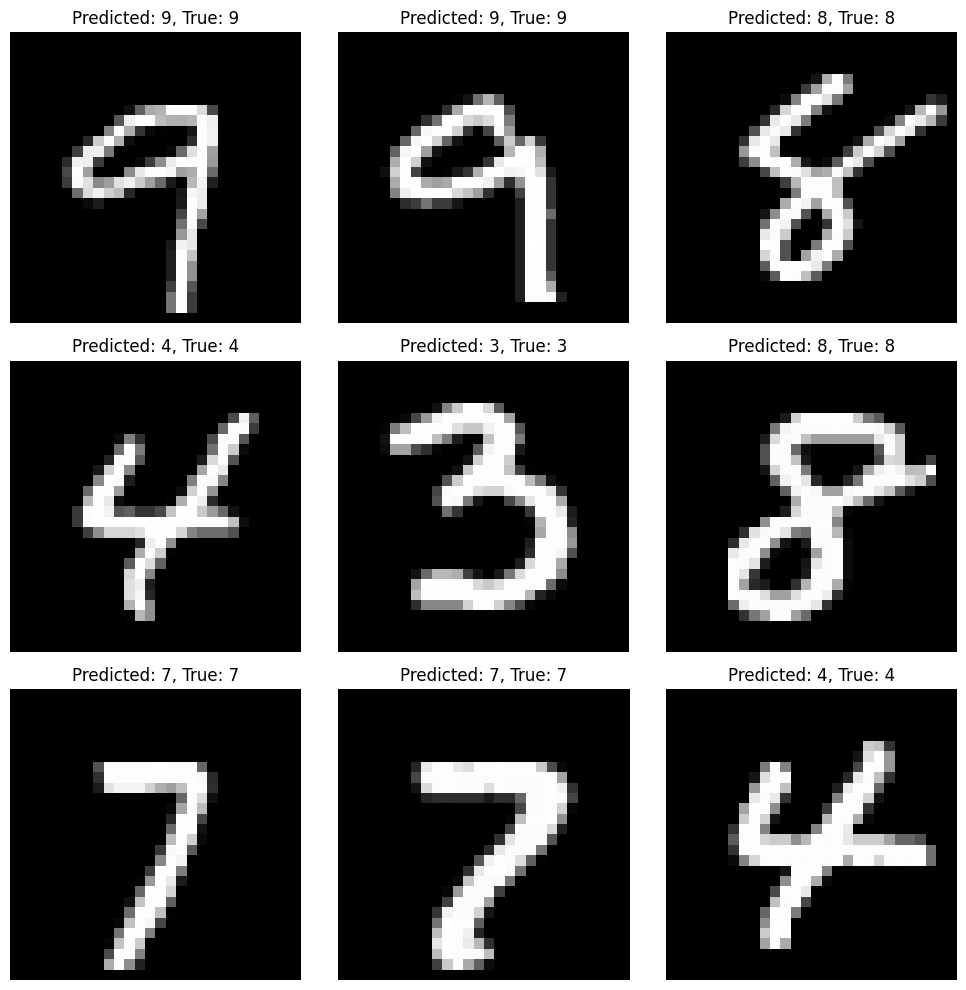

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Convert the predictions to class labels
y_pred = np.argmax(predictions, axis=1)

# Convert the one-hot encoded labels to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Calculate the accuracy
accuracy = accuracy_score(y_test_labels, y_pred)
print("Accuracy:", accuracy)

# Plot a random sample of test images with their predicted labels
num_samples = 9
random_indices = np.random.choice(len(X_test), size=num_samples, replace=False)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[idx]}, True: {y_test_labels[idx]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
